In [24]:
from utils import *
from gain_task_subvolt_kernel import subvolt_fit
%matplotlib inline
%load_ext autoreload
%autoreload 2
vol_file = '../Analysis/depreciated/analysis_sections_gain.csv'
dat_xls_file = pd.read_csv(vol_file, index_col=0)
dat_xls_file['folder'] = dat_xls_file['folder'].apply(lambda x: f'{x:0>8}')
dat_xls_file = dat_xls_file.reset_index()
t_pre = 100 # time window pre-swim
t_post = 350 # time window post-swim
t_label = np.arange(-t_pre, t_post)/300
t_sig = 240
sub_pad=9
visu_pad=200

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get fit for all cells

In [2]:
_ = np.load('depreciated/spike_fit.npz', allow_pickle=True)

### Explained variance

In [17]:
ev_model = _['ev_full_list']*100
ev_sub = _['ev_sub_list']*100
explain_ratio = ev_sub/(ev_model-ev_sub)

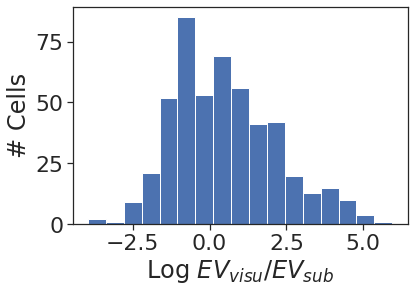

In [20]:
plt.hist(np.log(explain_ratio))
plt.ylabel('# Cells')
plt.xlabel('Log $EV_{visu}/EV_{sub}$')
plt.show()

## Weight

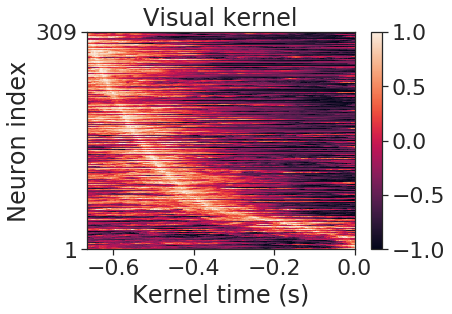

In [40]:
explain_ratio = ev_sub/ev_model
w_ = _['wfull_list'].squeeze()
valid_ind = explain_ratio<0.7
w_swim = w_[valid_ind, (sub_pad+1):]
w_swim_norm = w_swim/np.abs(w_swim).max(axis=-1, keepdims=True)
w_ind = np.argmax(w_swim_norm, axis=-1)
w_order = np.argsort(w_ind)

plt.figure()
plt.imshow(w_swim_norm[w_order], extent=(-visu_pad/300, 0/300, 1, len(w_order)), aspect='auto')
plt.yticks([1, len(w_order)])
plt.ylabel('Neuron index')
plt.xlabel('Kernel time (s)')
plt.title('Visual kernel')
plt.colorbar()
plt.show()